# Spotify Clustering

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
spotify = pd.read_csv("../data/spotify_df.csv")

In [5]:
spotify.head(3)

,Unnamed: 0,song_name,artist_name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri.1,duration_ms,time_signature
0,0,Like a Rolling Stone,['Bob Dylan'],spotify:track:3AhXZa8sUQht0UEdBJgpGc,0.483,0.721,0,-6.836,1,0.0320,0.729000,0.000000,0.189,0.562,95.261,spotify:track:3AhXZa8sUQht0UEdBJgpGc,369600,4
1,1,Smells Like Teen Spirit,['Nirvana'],spotify:track:3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.138,0.767,116.835,spotify:track:3oTlkzk1OtrhH8wBAduVEi,300977,4
2,2,A Day In The Life - Remastered,['The Beatles'],spotify:track:3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.922,0.175,163.219,spotify:track:3ZFBeIyP41HhnALjxWy1pR,337413,4


In [6]:
clustering = spotify[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [7]:
clustering.head(3)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.483,0.721,0,-6.836,0.0320,0.729000,0.000000,0.189,0.562,95.261
1,0.485,0.863,1,-9.027,0.0495,0.000012,0.016200,0.138,0.767,116.835
2,0.364,0.457,4,-14.162,0.0675,0.290000,0.000106,0.922,0.175,163.219


In [8]:
clustering_prep = StandardScaler().fit_transform(clustering)

In [9]:
pd.DataFrame(clustering_prep, columns=clustering.columns).head(3)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.525078,0.442719,-1.489740,0.573998,-0.529081,1.330755,-0.430706,0.002618,-0.046787,-0.929961
1,-0.513118,1.057709,-1.207845,0.005352,-0.298986,-0.936170,-0.361728,-0.331261,0.787927,-0.155602
2,-1.236720,-0.700642,-0.362161,-1.327373,-0.062318,-0.034398,-0.430255,4.801305,-1.622565,1.509267


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

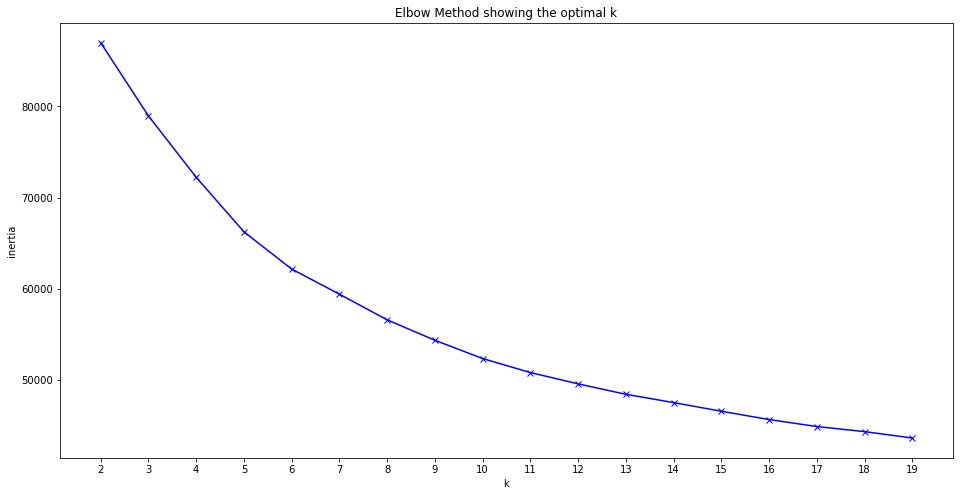

In [10]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(clustering_prep)
    inertia.append(kmeans.inertia_)

%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

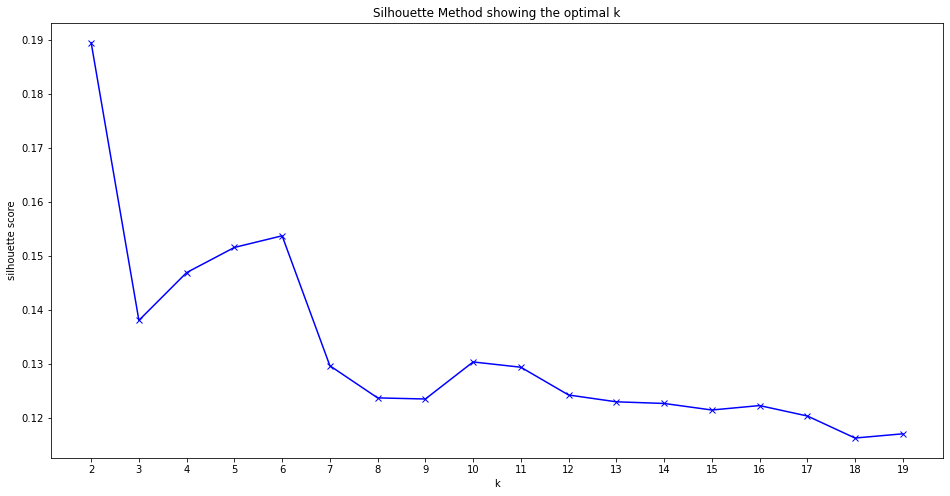

In [11]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(clustering_prep)
    silhouette.append(silhouette_score(clustering_prep, kmeans.predict(clustering_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [12]:
#testing for inertia scores

score_list = []
for i in range(2,10):
    kmeans_model = KMeans(n_clusters=i, random_state=3).fit(clustering_prep)
    preds = kmeans_model.predict(clustering_prep)
    score_list.append(kmeans_model.inertia_)

In [13]:
print(score_list)

[86997.10570655811, 78964.74959379129, 72226.45609573493, 66239.92739530049, 62147.81318656428, 58910.108942293824, 56568.83054544133, 54328.63890412354]


In [14]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(clustering_prep)

KMeans(n_clusters=6, random_state=1234)

In [15]:
clusters = kmeans.predict(clustering_prep)
pd.Series(clusters).value_counts().sort_index()

0    2222
1    2451
2     712
3    3423
4     746
5     968
dtype: int64

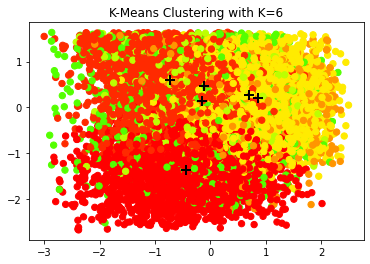

In [16]:
# visualize clusters on principle components
plt.title('K-Means Clustering with K=6')
plt.scatter(clustering_prep[:,0], clustering_prep[:,1], s=40, c=kmeans.labels_, cmap=plt.cm.prism)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

In [17]:
spotify_df = pd.DataFrame(spotify)
spotify_df['cluster'] = clusters
spotify_df

,Unnamed: 0,song_name,artist_name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri.1,duration_ms,time_signature,cluster
0,0,Like a Rolling Stone,['Bob Dylan'],spotify:track:3AhXZa8sUQht0UEdBJgpGc,0.483,0.721,0,-6.836,1,0.0320,0.729000,0.000000,0.1890,0.562,95.261,spotify:track:3AhXZa8sUQht0UEdBJgpGc,369600,4,3
1,1,Smells Like Teen Spirit,['Nirvana'],spotify:track:3oTlkzk1OtrhH8wBAduVEi,0.485,0.863,1,-9.027,1,0.0495,0.000012,0.016200,0.1380,0.767,116.835,spotify:track:3oTlkzk1OtrhH8wBAduVEi,300977,4,3
2,2,A Day In The Life - Remastered,['The Beatles'],spotify:track:3ZFBeIyP41HhnALjxWy1pR,0.364,0.457,4,-14.162,0,0.0675,0.290000,0.000106,0.9220,0.175,163.219,spotify:track:3ZFBeIyP41HhnALjxWy1pR,337413,4,4
3,3,Good Vibrations (Mono),['The Beach Boys'],spotify:track:5Qt4Cc66g24QWwGP3YYV9y,0.398,0.413,1,-10.934,1,0.0388,0.082200,0.000025,0.0891,0.331,133.574,spotify:track:5Qt4Cc66g24QWwGP3YYV9y,219147,4,1
4,4,Johnny B Goode,['Chuck Berry'],spotify:track:7MH2ZclofPlTrZOkPzZKhK,0.518,0.756,10,-10.851,1,0.0915,0.735000,0.000062,0.3170,0.968,166.429,spotify:track:7MH2ZclofPlTrZOkPzZKhK,160893,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10517,10517,Close To Me,"['Ellie Goulding', 'Diplo', 'Swae Lee']",spotify:track:2GjMaJ7DacMIkgoe8oMXGg,0.806,0.546,9,-6.637,1,0.0575,0.300000,0.000000,0.1020,0.874,147.986,spotify:track:4umIPjkehX1r7uhmGvXiSV,212867,4,3
10518,10518,The Chain - 2004 Remaster,['Fleetwood Mac'],spotify:track:5e9TFTbltYBg2xThimr0rU,0.475,0.370,4,-7.725,0,0.0361,0.819000,0.057700,0.0841,0.157,144.828,spotify:track:2uIX8YMNjGMD7441kqyyNU,200560,4,0
10519,10519,Go Your Own Way - 2004 Remaster,['Fleetwood Mac'],spotify:track:4xh7W7tlNMIczFhupCPniY,0.483,0.412,7,-8.461,1,0.0402,0.737000,0.000000,0.1160,0.247,170.163,spotify:track:41zXlQxzTi6cGAjpOXyLYH,203569,3,0
10520,10520,Mr. Blue Sky,['Electric Light Orchestra'],spotify:track:2RlgNHKcydI9sayD2Df2xp,0.671,0.771,7,-4.821,0,0.0316,0.004920,0.000007,0.3540,0.436,90.003,spotify:track:27tNWlhdAryQY04Gb2ZhUI,223546,4,4
